# Regression Modeling for GPA

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [7, 6]

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## Data Import

In [3]:
df = pd.read_csv('./data/cleaned_student_lifetyle_dataset.csv')

In [4]:
df.head()

,Student_ID,Study_Hours,Extracurricular_Hours,Sleep_Hours,Social_Hours,Physical_Activity_Hours,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [5]:
df = df.drop(columns=['Stress_Level', 'Student_ID'])
# stress level should not be considered for determining GPA, as it will be used in classification. 
# Student Id is irrelevent for model training

In [6]:
df.head()

,Study_Hours,Extracurricular_Hours,Sleep_Hours,Social_Hours,Physical_Activity_Hours,GPA
0,6.9,3.8,8.7,2.8,1.8,2.99
1,5.3,3.5,8.0,4.2,3.0,2.75
2,5.1,3.9,9.2,1.2,4.6,2.67
3,6.5,2.1,7.2,1.7,6.5,2.88
4,8.1,0.6,6.5,2.2,6.6,3.51


## Model Training

In [7]:
X = df.drop(columns='GPA')
y = df['GPA']

In [8]:
test_sizes = np.arange(0.2, 0.4, 0.01)
r2_scores = []
rmse_scores = []
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=test_size)
    lr = LinearRegression()
    rf = RandomForestRegressor()
    lr.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    r2_scores.append({'Linear Regression': lr.score(X_test, y_test), \
                      'Random Forest': rf.score(X_test, y_test)})
    lr_preds = lr.predict(X_test)
    rf_preds = rf.predict(X_test)
    baseline_preds = np.full_like(y_test, y_test.mean())
    rmse_scores.append({'Linear Regression': root_mean_squared_error(y_test, lr_preds), \
                        'Random Forest': root_mean_squared_error(y_test, rf_preds), \
                        'Baseline': root_mean_squared_error(y_test, baseline_preds)})

In [9]:
r2 = pd.DataFrame(r2_scores)
rmse = pd.DataFrame(rmse_scores)

In [10]:
r2['test_size'] = test_sizes
rmse['test_size'] = test_sizes

In [11]:
r2

,Linear Regression,Random Forest,test_size
0,0.557928,0.456233,0.20
1,0.559849,0.467776,0.21
2,0.560868,0.466316,0.22
3,0.555002,0.466610,0.23
4,0.555716,0.466389,0.24
5,0.551089,0.452041,0.25
6,0.549802,0.452063,0.26
7,0.543846,0.450893,0.27
8,0.539468,0.442563,0.28
9,0.536470,0.439813,0.29


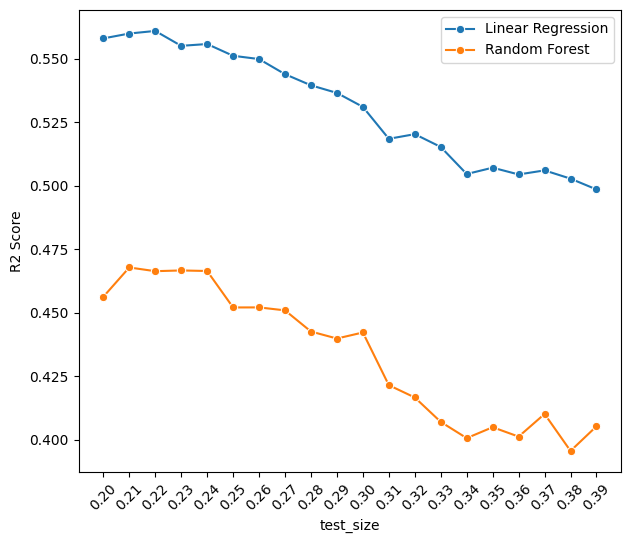

In [12]:
sns.lineplot(data=r2, x='test_size', y='Linear Regression', marker='o', label='Linear Regression')
sns.lineplot(data=r2, x='test_size', y='Random Forest', marker='o', label='Random Forest')
plt.ylabel("R2 Score")
plt.xticks(test_sizes, rotation=45);

In [13]:
rmse

,Linear Regression,Random Forest,Baseline,test_size
0,0.189260,0.209903,0.284651,0.20
1,0.187377,0.206046,0.282433,0.21
2,0.186182,0.205249,0.280957,0.22
3,0.189044,0.206970,0.283390,0.23
4,0.189346,0.207510,0.284071,0.24
5,0.188925,0.208729,0.281974,0.25
6,0.188580,0.208046,0.281057,0.26
7,0.190462,0.208969,0.282003,0.27
8,0.190379,0.209453,0.280537,0.28
9,0.189644,0.208481,0.278548,0.29


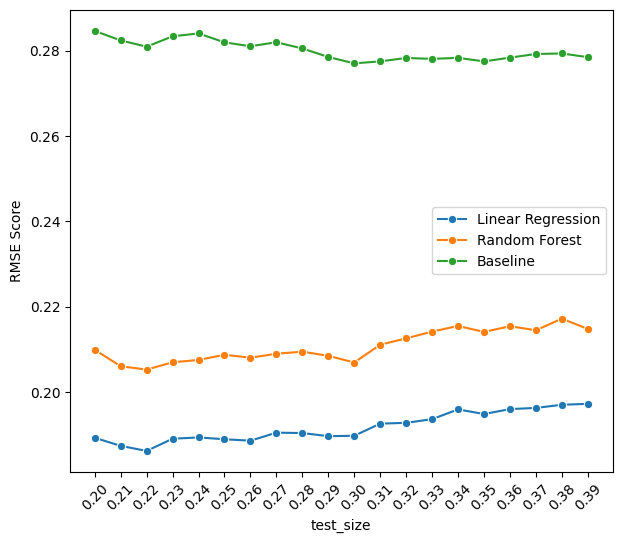

In [14]:
sns.lineplot(data=rmse, x='test_size', y='Linear Regression', marker='o', label='Linear Regression')
sns.lineplot(data=rmse, x='test_size', y='Random Forest', marker='o', label='Random Forest')
sns.lineplot(data=rmse, x='test_size', y='Baseline', marker='o', label='Baseline')
plt.ylabel("RMSE Score")
plt.xticks(test_sizes, rotation=45);

## KNN

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.36)

In [17]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc  = sc.transform(X_test)

In [18]:
scores = []
for neighbor in range(3, 40, 2):
    knn = KNeighborsRegressor(n_neighbors=neighbor)
    
    knn.fit(X_train_sc, y_train)
    k_preds = knn.predict(X_test_sc)
    scores.append({'K': neighbor, 'R2': knn.score(X_test_sc, y_test), 'RMSE': root_mean_squared_error(y_test, k_preds)})

knn_scores = pd.DataFrame(scores)

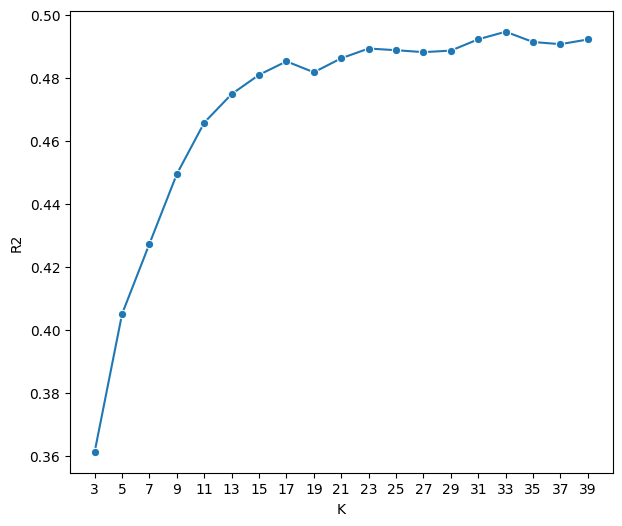

In [19]:
sns.lineplot(data=knn_scores, x='K', y='R2', marker='o')
plt.xticks(range(3, 40, 2));

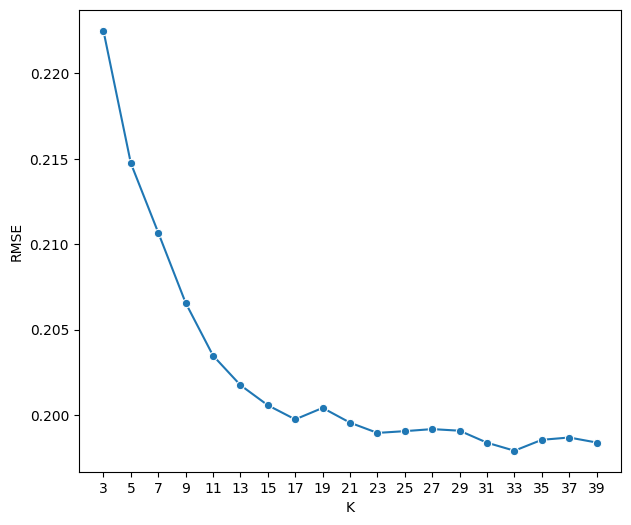

In [20]:
sns.lineplot(data=knn_scores, x='K', y='RMSE', marker='o')
plt.xticks(range(3, 40, 2));

In [21]:
knn_scores

,K,R2,RMSE
0,3,0.361311,0.222489
1,5,0.405033,0.214739
2,7,0.427315,0.210679
3,9,0.449442,0.206569
4,11,0.465760,0.203485
5,13,0.474797,0.201757
6,15,0.480908,0.200580
7,17,0.485176,0.199753
8,19,0.481706,0.200425
9,21,0.486166,0.199561


## Best Model Score Analysis

The best model was Linear Regression with a test size of 0.22

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.22)
lr = LinearRegression()
lr.fit(X_train, y_train)
r2_scorev = lr.score(X_test, y_test)
lr_preds = lr.predict(X_test)
# baseline_preds = np.full_like(y_test, y_test.mean())
rmse_score = root_mean_squared_error(y_test, lr_preds)

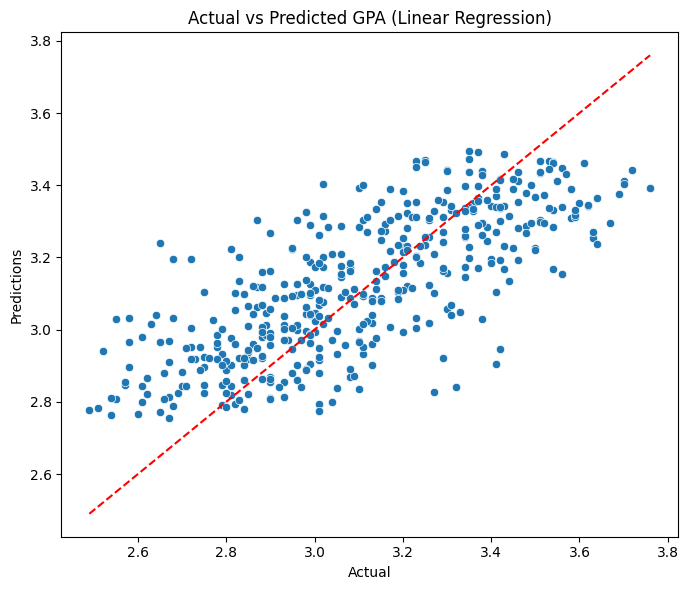

In [23]:
sns.scatterplot(x=y_test, y=lr_preds)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual vs Predicted GPA (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
# plt.savefig("../images/act_vs_pred_lr.png")

In [24]:
import joblib

In [26]:
joblib.dump(lr, "reg.pkl")

['reg.pkl']